# NLP email Sentiment Analysis 

https://towardsdatascience.com/3-super-simple-projects-to-learn-natural-language-processing-using-python-8ef74c757cd9

In [132]:
import pandas as pd
from textblob import TextBlob
import bamboolib as bam

In [133]:
df = pd.read_csv('cleaned_emails.csv')

In [134]:
df

                                             clean_text  spam
0     subject naturally irresistible your corporate ...     1
1     subject the stock trading gunslinger fanny is ...     1
2     subject unbelievable new homes made easy im wa...     1
3     subject color printing special request additio...     1
4     subject do not have money  get software cds fr...     1
...                                                 ...   ...
5690  subject re  research and development charges t...     0
5691  subject re  receipts from visit jim thanks aga...     0
5692  subject re  enron case study update wow  all o...     0
5693  subject re  interest david please  call shirle...     0
5694  subject news  aurora  update aurora version th...     0

[5695 rows x 2 columns]

In [135]:
# create a textblob from the cleaned email texts
text_blob = [TextBlob(txt) for txt in df['clean_text']]

In [136]:
# add the sentiment metrics to the dataframe - polarity and subjectivity
df['blob_polarity'] = [blob.sentiment.polarity for blob in text_blob]
df['blob_subjectivity'] = [blob.sentiment.subjectivity for blob in text_blob]

In [137]:
df.head()

                                          clean_text  spam  blob_polarity  \
0  subject naturally irresistible your corporate ...     1       0.296607   
1  subject the stock trading gunslinger fanny is ...     1       0.160317   
2  subject unbelievable new homes made easy im wa...     1       0.040229   
3  subject color printing special request additio...     1       0.163492   
4  subject do not have money  get software cds fr...     1       0.433333   

   blob_subjectivity  
0           0.546905  
1           0.562698  
2           0.480581  
3           0.468254  
4           0.395833  

In [138]:
df.describe()

              spam  blob_polarity  blob_subjectivity
count  5695.000000    5695.000000        5695.000000
mean      0.240211       0.103157           0.408442
std       0.427249       0.132474           0.108309
min       0.000000      -0.388889           0.055556
25%       0.000000       0.022515           0.333333
50%       0.000000       0.108333           0.408034
75%       0.000000       0.187788           0.473409
max       1.000000       0.646667           0.826667

## NLP spam_detection

In [139]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

In [140]:
df = pd.read_csv('cleaned_emails.csv')
df

                                             clean_text  spam
0     subject naturally irresistible your corporate ...     1
1     subject the stock trading gunslinger fanny is ...     1
2     subject unbelievable new homes made easy im wa...     1
3     subject color printing special request additio...     1
4     subject do not have money  get software cds fr...     1
...                                                 ...   ...
5690  subject re  research and development charges t...     0
5691  subject re  receipts from visit jim thanks aga...     0
5692  subject re  enron case study update wow  all o...     0
5693  subject re  interest david please  call shirle...     0
5694  subject news  aurora  update aurora version th...     0

[5695 rows x 2 columns]

In [141]:
# convert the text data into matrix of numbers using CountVectorizer
text_vect = CountVectorizer()
text_vect = text_vect.fit_transform(df['clean_text'])

In [142]:
# splitting the text vector into training and testing set
x_train, x_test, y_train, y_test = train_test_split(text_vect, df['spam'], test_size=0.2, random_state=42, shuffle=True)

In [143]:
# using the GradientBoostingClassifier() from the ensemble collection within scikit-learn
classifier = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=6)

In [144]:
# fit the classifier on the training set
classifier.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=6)

In [145]:
# making the predictions
y_pred = classifier.predict(x_test)

In [146]:
# generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       843
           1       0.98      0.93      0.95       296

    accuracy                           0.98      1139
   macro avg       0.98      0.96      0.97      1139
weighted avg       0.98      0.98      0.98      1139



## NLP Word Cloud


In [147]:
%matplotlib inline

import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords


In [148]:
df = pd.read_csv('emails.csv')
df.head()

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

In [149]:
# number of records already marked as spam
spam_count = len(df.loc[df['spam'] == 1].index)

In [150]:
# number of records already marked as not spam
non_spam_count = len(df.loc[df['spam'] == 0].index)

In [151]:
# printing the counts
print(f'Spam: {spam_count}')
print(f'Non Spam / Ham: {non_spam_count}')

Spam: 1368
Non Spam / Ham: 4360


In [152]:
# identify if there are any duplicates in the dataset
mask = df.duplicated()
df[mask]

                                                   text  spam
2155  Subject: research allocations to egm  hi becky...     0
2260  Subject: departure of grant masson  the resear...     0
2412  Subject: re : schedule and more . .  jinbaek ,...     0
2473  Subject: day off tuesday  stinson ,  i would l...     0
2763  Subject: re : your mail  zhendong ,  dr . kami...     0
3123  Subject: re : grades  pam ,  the students rese...     0
3152  Subject: tiger evals - attachment  tiger hosts...     0
3248  Subject: re : i am zhendong  zhendong ,  thank...     0
3249  Subject: hello from enron  dear dr . mcmullen ...     0
3387  Subject: term paper  dr . kaminski ,  attached...     0
3573  Subject: telephone interview with the enron re...     0
3660  Subject: re : summer work . .  jinbaek ,  this...     0
3690  Subject: re : weather and energy price data  m...     0
3823  Subject: research get - together at sandeep ko...     0
4203  Subject: re : willow and pathstar evaluations ...     0
4390  Su

In [153]:
len(df[mask].index) 

33

In [154]:
df_unique = df.drop_duplicates()
df_unique.reset_index(inplace=True, drop=True)

In [155]:
df_unique.head()

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

In [156]:
# number of records already marked as spam
spam_count = len(df_unique.loc[df_unique['spam'] == 1].index)

# number of records already marked as not spam
non_spam_count = len(df_unique.loc[df_unique['spam'] == 0].index)

In [157]:
# printing the counts
print(f'Spam: {spam_count}')
print(f'Non Spam / Ham: {non_spam_count}')

Spam: 1368
Non Spam / Ham: 4327


In [158]:
len(df_unique['text'])

5695

In [159]:
# cleaning the text
clean_text_collection = []

for word in range(len(df_unique['text'])):
    # convert the word to lower case
    clean_text = df_unique['text'][word].lower()

    # remove punctuations
    clean_text = re.sub('[^a-zA-Z]', ' ', clean_text)

    # remove markup language tags
    clean_text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", clean_text)

    # remove digits and special characters
    clean_text = re.sub('(\\d | \\W)+', ' ', clean_text)

    clean_text_collection.append(clean_text)

# create a new column in the dataframe to hold the cleaned text
df_unique['clean_text'] = clean_text_collection

In [160]:
df_unique.head()

                                                text  spam  \
0  Subject: naturally irresistible your corporate...     1   
1  Subject: the stock trading gunslinger  fanny i...     1   
2  Subject: unbelievable new homes made easy  im ...     1   
3  Subject: 4 color printing special  request add...     1   
4  Subject: do not have money , get software cds ...     1   

                                          clean_text  
0  subject naturally irresistible your corporate ...  
1  subject the stock trading gunslinger fanny is ...  
2  subject unbelievable new homes made easy im wa...  
3  subject color printing special request additio...  
4  subject do not have money  get software cds fr...  

In [161]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [162]:
stop_words = stopwords.words('english')

In [163]:
email_stop_words = ['re', 'fw', 'subject']

In [164]:
stop_words.extend(email_stop_words)

In [165]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [166]:
# constructing a wordcloud object
word_cloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, max_words=100, min_font_size=20)

In [167]:
wordclouded = word_cloud.generate(str(df_unique['clean_text']))

(-0.5, 799.5, 799.5, -0.5)

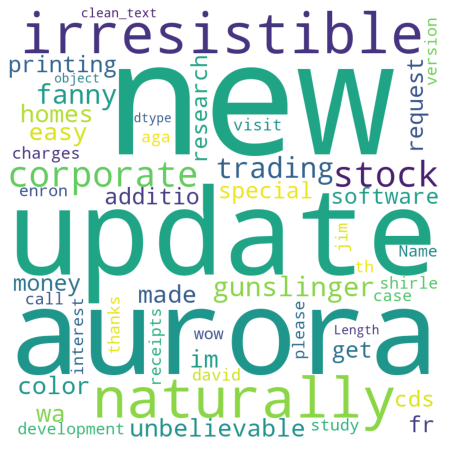

In [168]:
# plotting the wordcloud
fig = plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordclouded)
plt.axis('off')